In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import rlgraph
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [13]:
name='rl_ttl_strategy_'
directory= 'results/rl_ttl_strategy/cache_capacity_5000/2019_05_26_15_01'
caching_strategy_dir = f'{directory}/ttl_strategy'


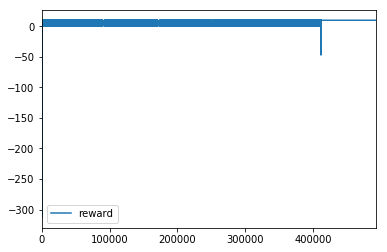

In [49]:
# Useful to compare various RL architecture 
# episode_reward_df = pd.read_csv(f'{eviction_strategy_dir}/{name}reward_logger.log', names=['reward'], parse_dates=True)
# ax = episode_reward_df.resample('5T').sum().plot(title='Sum of reward achieved')
# ax.set_xlabel("Time")
# ax.set_ylabel("Reward")
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/{name}reward_logger.log', names=['timestamp', 'episode','reward'], usecols=['reward'])
episode_reward_df.plot()


Text(0.5, 0, 'Steps')

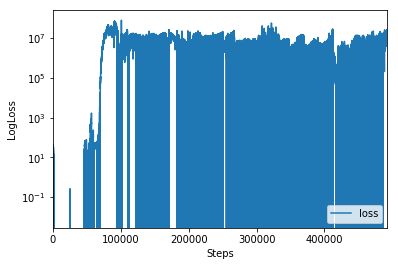

In [48]:

# losses_df = pd.read_csv(f'{eviction_strategy_dir}/{name}loss_logger.log', names=['loss'], parse_dates=True)
# 
# ax = losses_df.resample('5T').sum().plot(logy=True)
# ax.set_ylabel("Loss")
# ax.set_xlabel("Time")

losses_df = pd.read_csv(f'{caching_strategy_dir}/{name}loss_logger.log', names=['timestamp','episode','loss'], usecols=['loss'])
ax = losses_df.plot(y='loss', logy=True)
ax.set_ylabel("LogLoss")
ax.set_xlabel("Steps")


In [42]:
import numpy as np

observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log',
                              names=['timestamp','episode','observation',
                                     'key', 'ttl', 'real_ttl', 'hits'], 
                              usecols=['episode','ttl', 'real_ttl', 'observation'])
observations_df['rlcache_ttl'] = (observations_df['ttl'] - observations_df['real_ttl']) 
observations_df['fixed_ttl'] = (60 - observations_df['real_ttl']) 
observations_df['episode'] = observations_df['episode'] + np.where('EndOfEpisode' == observations_df['observation'], -1, 0)
res_df = observations_df.groupby('episode').mean()[['rlcache_ttl', 'fixed_ttl']]
res_df.index = [0, 5, 10, 25, 50, 100]

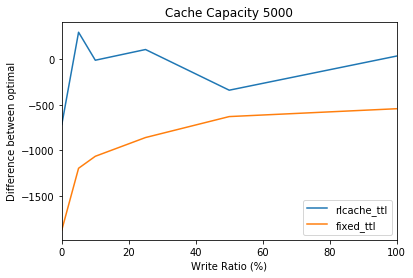

In [44]:
ax = res_df.plot()
ax.set_xlabel('Write Ratio (%)')
ax.set_ylabel('Difference between optimal')
ax.set_title(f'Cache Capacity 5000')
fig = ax.get_figure()
fig.savefig('plots/ttl_strategy/diff_5000.pdf')


In [ ]:


observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log',
                              names=['timestamp','episode','observation',
                                     'key', 'ttl', 'real_ttl', 'hits'], 
                              usecols=['episode','ttl', 'real_ttl', 'observation'])
observations_df['rlcache_ttl'] = (observations_df['ttl'] - observations_df['real_ttl']) 
observations_df['fixed_ttl'] = (60 - observations_df['real_ttl']) 
observations_df['episode'] = observations_df['episode'] + np.where('EndOfEpisode' == observations_df['observation'], -1, 0)
res_df = observations_df.groupby('episode').mean()[['rlcache_ttl', 'fixed_ttl']]
res_df.index = [0, 5, 10, 25, 50, 100]

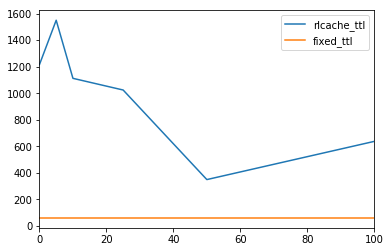

In [46]:


observations_df = pd.read_csv(f'{caching_strategy_dir}/{name}ttl_logger.log',
                              names=['timestamp','episode','observation',
                                     'key', 'ttl', 'real_ttl', 'hits'], 
                              usecols=['episode','ttl', 'real_ttl', 'observation'])
observations_df['rlcache_ttl'] = (observations_df['ttl']) 
observations_df['fixed_ttl'] = (60) 
observations_df['episode'] = observations_df['episode'] + np.where('EndOfEpisode' == observations_df['observation'], -1, 0)
res_df = observations_df.groupby('episode').mean()[['rlcache_ttl', 'fixed_ttl']]
res_df.index = [0, 5, 10, 25, 50, 100]
res_df.plot()